In [24]:
import os

In [25]:
annotation_dir = "./annotations/"
image_dir = "./images"

In [26]:
annotation_path_list = sorted(
  name for name in os.listdir(annotation_dir)
  if name.endswith(".xml")
)
len(annotation_path_list),annotation_path_list[:3]

(853, ['maksssksksss0.xml', 'maksssksksss1.xml', 'maksssksksss10.xml'])

In [27]:
image_path_list = sorted(
  name for name in os.listdir(image_dir)
  if name.endswith(".png")
)
len(image_path_list),image_path_list[:3]

(853, ['maksssksksss0.png', 'maksssksksss1.png', 'maksssksksss10.png'])

In [28]:
for image_path, annotation_path in zip(image_path_list, annotation_path_list):
        if image_path[:-4] != annotation_path[:-4]:
            raise Exception(f"{image_path} 1= {annotion_path}")

In [29]:
image_path_list = [
    os.path.join(image_dir, name) for name in image_path_list ]

annotation_path_list = [
    os.path.join(annotation_dir, name) for name in annotation_path_list
]

print(image_path_list[:2])
print(annotation_path_list[:2])

['./images\\maksssksksss0.png', './images\\maksssksksss1.png']
['./annotations/maksssksksss0.xml', './annotations/maksssksksss1.xml']


In [30]:
#!pip install opencv-python

In [31]:
#!pip install matplotlib

# Show image

In [32]:
import cv2
from matplotlib import pyplot as plt

In [33]:
def read_image(image_path):
    bgr = cv2.imread(image_path,cv2.IMREAD_COLOR)
    rgb = cv2.cvtColor(bgr,cv2.COLOR_BGR2RGB)
    return rgb
def show_image(rgb):
    plt.imshow(rgb)
    plt.show()

In [34]:
index = 1
image_path = image_path_list[index]
print(image_path)

./images\maksssksksss1.png


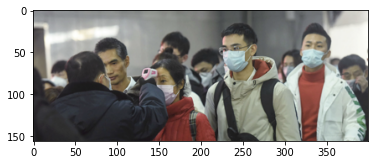

In [35]:
rgb = read_image(image_path)

show_image(rgb)

In [36]:
#!pip install beautifulsoup4

# แกะ  XML 

In [37]:
from bs4 import BeautifulSoup

In [38]:
def extract_xml(xml_path):
    with open(xml_path, "r") as file:
        raw = file.read()
        soup = BeautifulSoup(raw)
    object_list = soup.find_all("object")        
    annotations_list = []      
    for obj in object_list:
        name = obj.find("name").text
        bndbox = obj.find("bndbox")
        xmin = int(bndbox.find("xmin").text)
        ymin = int(bndbox.find("ymin").text)
        xmax = int(bndbox.find("xmax").text)
        ymax = int(bndbox.find("ymax").text)
        #print(name, [xmin,ymin,xmax,ymax])
        annotations_list.append({
            "class" : name,
            "bbox" : [xmin,ymin,xmax,ymax]
        })    
    return annotations_list

In [39]:
annotation_path = annotation_path_list[index]
print(annotation_path)

./annotations/maksssksksss1.xml


In [40]:
annotations_list = extract_xml(annotation_path)
annotations_list

[{'class': 'with_mask', 'bbox': [321, 34, 354, 69]},
 {'class': 'with_mask', 'bbox': [224, 38, 261, 73]},
 {'class': 'with_mask', 'bbox': [299, 58, 315, 81]},
 {'class': 'with_mask', 'bbox': [143, 74, 174, 115]},
 {'class': 'with_mask', 'bbox': [74, 69, 95, 99]},
 {'class': 'with_mask', 'bbox': [191, 67, 221, 93]},
 {'class': 'with_mask', 'bbox': [21, 73, 44, 93]},
 {'class': 'with_mask', 'bbox': [369, 70, 398, 99]},
 {'class': 'without_mask', 'bbox': [83, 56, 111, 89]}]

# Demo

In [41]:
print(index)
print(image_path)
print(annotation_path)

1
./images\maksssksksss1.png
./annotations/maksssksksss1.xml


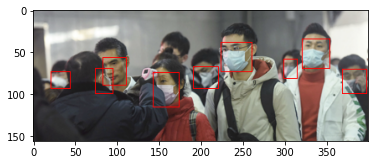

In [42]:
rgb = read_image(image_path)
for annotation in annotations_list:
    class_ = annotation["class"]
    bbox = annotation["bbox"]
    pt1 = tuple(bbox[:2])
    pt2 = tuple(bbox[2:])
    color = (255,0,0)
    thickness = 1
    
    cv2.rectangle(rgb, pt1, pt2, color, thickness)
show_image(rgb)

# Crop face

In [43]:
from tqdm import tqdm

In [44]:
with_mask_dir = "with_mask"
without_mask_dir = "without_mask"

In [45]:
with_count = 0
without_count = 0
zip_path_list = list(zip(image_path_list, annotation_path_list))
for image_path, annotation_path in tqdm(zip_path_list):
    rgb = read_image(image_path)
    annotation_list = extract_xml(annotation_path)
    for annotation in annotation_list:
        class_ = annotation["class"]
        bbox = annotation["bbox"]
        xmin, ymin, xmax, ymax = bbox
        croped = rgb[ymin:ymax, xmin:xmax, :]

        if class_ == "without_mask":
            without_count += 1
            fname = f"without_mask_{str(without_count).zfill(4)}.png"
            out_path = os.path.join(without_mask_dir, fname)
            bgr = cv2.cvtColor(croped, cv2.COLOR_RGB2BGR)
            cv2.imwrite(out_path, bgr)

        elif class_ == "with_mask":
            with_count += 1
            fname = f"with_mask_{str(with_count).zfill(4)}.png"
            out_path = os.path.join(with_mask_dir, fname)
            bgr = cv2.cvtColor(croped, cv2.COLOR_RGB2BGR)
            cv2.imwrite(out_path, bgr)

100%|████████████████████████████████████████████████████████████████████████████████| 853/853 [00:29<00:00, 29.18it/s]


In [46]:
print("with_mask:",with_count)
print("without_mask", without_count)

with_mask: 3232
without_mask 717
